In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [13]:
df=pd.read_csv("mnist_test.csv")
df.head()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
y = df.iloc[:, 0].values.reshape(-1, 1)  
X = df.iloc[:, 1:].values / 255.0         

encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [17]:
def create_model():
    model = Sequential([
        tf.keras.Input(shape=(784,)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model
batch_sizes = {
    "Full Batch": len(X_train),
    "Stochastic (SGD)": 1,
    "Mini Batch (32)": 32
}

history_dict = {}
for name, batch_size in batch_sizes.items():
    print(f"Training with {name} (batch size = {batch_size})...")
    model = create_model()
    history = model.fit(X_train, y_train, epochs=10, batch_size=batch_size, verbose=0, validation_data=(X_test, y_test))
    history_dict[name] = history

Training with Full Batch (batch size = 7999)...
Training with Stochastic (SGD) (batch size = 1)...
Training with Mini Batch (32) (batch size = 32)...


In [18]:
plt.figure(figsize=(14, 5))

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

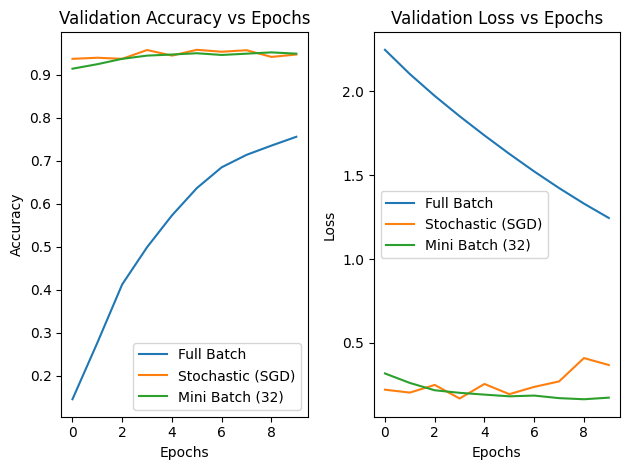

In [19]:
plt.subplot(1, 2, 1)
for name, history in history_dict.items():
    plt.plot(history.history['val_accuracy'], label=f"{name}")
plt.title("Validation Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
for name, history in history_dict.items():
    plt.plot(history.history['val_loss'], label=f"{name}")
plt.title("Validation Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()